In [1]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini


import warnings
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc ,roc_auc_score
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings("ignore")

In [12]:
def get_data(modle):
    df = pd.read_csv(base_path + modle +  '_train.csv')
    return df

def get_pred_class(df):
    threshold = np.percentile(df.pred,93.75)
    df['pred_class'] = 0
    df.pred_class[df.pred > threshold] = 1
    return df

def get_score(modle):
    data = get_data(modle)
    data = get_pred_class(data)
    TP,TN,FP,FN =0,0,0,0
    
    for i in range(len(data)):
        if data.y[i] == 1 and data.pred_class[i] == 1:
            TP += 1
        elif data.y[i] == 0 and data.pred_class[i] == 0:
            TN += 1
        elif data.y[i] == 0 and data.pred_class[i] == 1:
            FP += 1
        elif data.y[i] == 1 and data.pred_class[i] == 0: 
            FN += 1
            
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    accuracy = (TP+TN) / (TP+TN+FP+FN)
    F1_Score = 2*TP / (2*TP + FP + TN)
    FRR = FP / (FP+TN)
    PPR = TP / (TP+TN)
    gini = eval_gini(data.y, data.pred)
    auc = (gini+1)/2
    
    index = ['auc','gini','recall','precision','F1_Score','accuracy','FRR','PPR']
    score = [auc,gini,recall,precision,F1_Score,accuracy,FRR,PPR]
    result = pd.DataFrame(index=index, data=score, columns=['result'])
    return result


def plot_auc(modle):
    data = get_data(modle)
    data = get_pred_class(data)
    
    # 计算 ROC 曲线的点
    fpr, tpr, thresholds = roc_curve(data.y, data.pred)
    
    # 设置图片大小
    fig = plt.figure()
    fig.set(alpha=0)
    fig.set_size_inches(5, 4)
    
    # 画 ROC 曲线，以及随机情况下的 ROC 曲线
    plt.plot(fpr,tpr,'-',color=(1, 0.0, 0.0), label='ROC (area = %0.2f)' % roc_auc_score(data.y,data.pred), lw=1.7)
    plt.plot([0, 1], [0, 1], '--', color=(0.3, 0.3, 0.3), label='Random Chance', lw=2)
    
    # 填充 ROC 曲线的下方
    plt.fill_between(fpr, np.zeros(len(fpr)), tpr, color = (0.0, 1, 1), alpha = 0.3)
    
    # 图片调整
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(modle)
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')   
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    

In [5]:
base_path = 'D:/DataSet/Credit/result/'
file_list = ['linear','GLM','FFM', 'NN', 'SimpleBayes', 'BayesNet', 'RF', 'xgboost','RGF','gcForest','Ensemble','BadEnsemble']

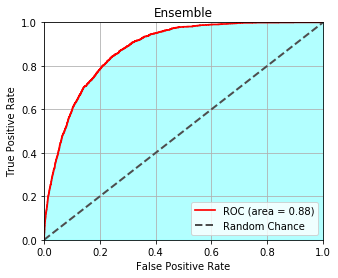

In [13]:
plot_auc('Ensemble')

In [8]:
get_score('BadEnsemble')

,result
auc,0.874304
gini,0.748608
recall,0.358400
precision,0.358400
F1_Score,0.045607
accuracy,0.919800
FRR,0.042773
PPR,0.024353
